<a href="https://colab.research.google.com/github/kim-juhyeon/Data-Scientists/blob/main/Store%20Sales%20-%20Time%20Series%20Forecasting/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 경쟁에서는 에콰도르에 있는 Favorita 매장에서 판매되는 수천 개의 제품군에 대한 매출을 예측합니다. 교육 데이터에는 날짜, 상점 및 제품 정보, 해당 품목이 판촉되었는지 여부, 판매 번호가 포함됩니다. 추가 파일에는 모델을 구축하는 데 유용할 수 있는 추가 정보가 포함되어 있습니다.

파일 설명 및 데이터 필드 정보
## train.csv
- store_nbr , family 및 onpromotion 기능의 시계열 과 목표 판매 로 구성된 훈련 데이터 .
- store_nbr 은 제품이 판매되는 상점을 식별합니다.
- 제품군 은 판매되는 제품 유형을 식별합니다.
- 판매 는 지정된 날짜에 특정 상점에서 제품군에 대한 총 판매를 제공합니다. 제품을 분수 단위로 판매할 수 있으므로 분수 값이 가능합니다(예: 칩 1봉지와 반대되는 1.5kg의 치즈).

- onpromotion 은 특정 날짜에 매장에서 판촉된 제품군의 총 항목 수를 제공합니다.
## test.csv
훈련 데이터와 동일한 기능을 갖는 테스트 데이터. 이 파일의 날짜에 대한 목표 판매 를 예측 합니다.
테스트 데이터의 날짜는 훈련 데이터의 마지막 날짜 이후 15일 동안입니다.
##sample_submission.csv
-올바른 형식의 샘플 제출 파일.
##상점.csv
- city , state , type 및 cluster 를 포함한 메타데이터를 저장 합니다 .
-클러스터 는 유사한 상점의 그룹입니다.
##기름.csv
- 일일 유가. 훈련 및 테스트 데이터 기간 동안의 값을 포함합니다. (에콰도르는 석유 의존도가 높은 국가로 경제적 건전성이 유가 충격에 매우 취약합니다.)
##Holidays_events.csv
- 메타데이터가 포함된 휴일 및 이벤트
- 참고: 전송된 열에 특히 주의하십시오 . 공식적으로 이전된 휴일은 해당 달력 날짜에 속하지만 정부에 의해 다른 날짜로 이동되었습니다. 옮겨진 날은 휴일이라기보다 평범한 날에 가깝다. 실제로 축하된 날을 찾으려면 유형이 Transfer인 해당 행을 찾으십시오. 예를 들어, Independencia de Guayaquil 휴일은 2012-10-09에서 2012-10-12로 변경되었으므로 2012-10-12에 축하되었습니다. Bridge 유형인 날은 휴일에 추가되는 추가 날입니다(예: 긴 주말에 휴식을 연장하기 위해). 이는 일반적으로 브리지에 투자금을 회수하기 위한 작업(예: 토요일)으로 일반적으로 예정되지 않은 날인 작업일 유형으로 구성됩니다.

- 추가 공휴일은 예를 들어 일반적으로 크리스마스 즈음(크리스마스 이브를 공휴일로 지정)에 발생하는 정규 달력 공휴일에 추가된 날입니다.
##추가 참고 사항
- 공공부문의 임금은 2주마다 매월 15일과 말일에 지급된다. 슈퍼마켓 판매는 이에 영향을 받을 수 있습니다.
- 2016년 4월 16일에 규모 7.8의 지진이 에콰도르를 강타했습니다. 지진 후 몇 주 동안 슈퍼마켓 판매에 큰 영향을 미친 생수 및 기타 생필품을 기부하는 구호 활동에 사람들이 모였습니다.



##문맥
- 예보는 기상학자만을 위한 것이 아닙니다. 정부는 경제 성장을 예측합니다. 과학자들은 미래 인구를 예측하려고 시도합니다. 그리고 기업은 제품 수요를 예측합니다. 이는 전문 데이터 과학자의 일반적인 작업입니다. 예측은 특히 얼마나 많은 재고를 살 것인지에 따라 미묘하게 움직여야 하는 오프라인 식료품점과 관련이 있습니다. 조금 더 예측하면 식료품 가게는 재고가 너무 많고 부패하기 쉬운 상품에 갇히게 됩니다. 조금만 생각하면 인기 상품이 빨리 매진되어 수익이 떨어지고 고객이 화를 냅니다. 머신 러닝 덕분에 보다 정확한 예측은 소매업체가 적시에 적절한 제품을 충분히 공급함으로써 고객을 만족시키는 데 도움이 될 수 있습니다.

- 소매업에 대한 현재의 주관적인 예측 방법은 백업할 데이터가 거의 없으며 자동화될 가능성이 낮습니다. 소매업체가 고유한 요구 사항, 신제품, 끊임없이 변화하는 계절적 취향 및 예측할 수 없는 제품 마케팅을 가진 새로운 위치를 추가함에 따라 문제는 훨씬 더 복잡해집니다.

- 잠재적 인 영향
성공하면 실제 사례에서 몇 가지 새로운 기술을 구사할 수 있습니다. 식료품점의 경우 보다 정확한 예측을 통해 재고 과잉과 관련된 음식물 쓰레기를 줄이고 고객 만족도를 높일 수 있습니다. 이 지속적인 경쟁의 결과는 시간이 지남에 따라 다음에 쇼핑할 때 지역 상점에 정확히 필요한 것이 있는지 확인할 수도 있습니다.

In [2]:
import numpy as np
import pandas as pd

import os
import cv2
import glob
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
holiday=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/holidays_events.csv')
oil=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/oil.csv')
sample_submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/sample_submission.csv')
stores=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/stores.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/test.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/train.csv')
transactions=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/transactions.csv')

In [5]:
print(train.shape)
train.head()

(3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [6]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [22]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,54.0
28508,3029396,2017-08-31,9,PREPARED FOODS,10.0
28509,3029397,2017-08-31,9,PRODUCE,302.0
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,15.0


In [7]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [20]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [9]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [10]:
train1 = train.merge(oil, on = 'date', how='left')
train1

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0.0,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0.0,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0.0,NaN
4,4,2013-01-01,1,BOOKS,0.000,0.0,NaN
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,15.0,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,8.0,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148.0,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,10.0,47.57


### Table join
 - right / left
 - inner
 - outer

 - on:을 이용해서 어떤 칼럼 기준으로 merge를 진행할건지 설정

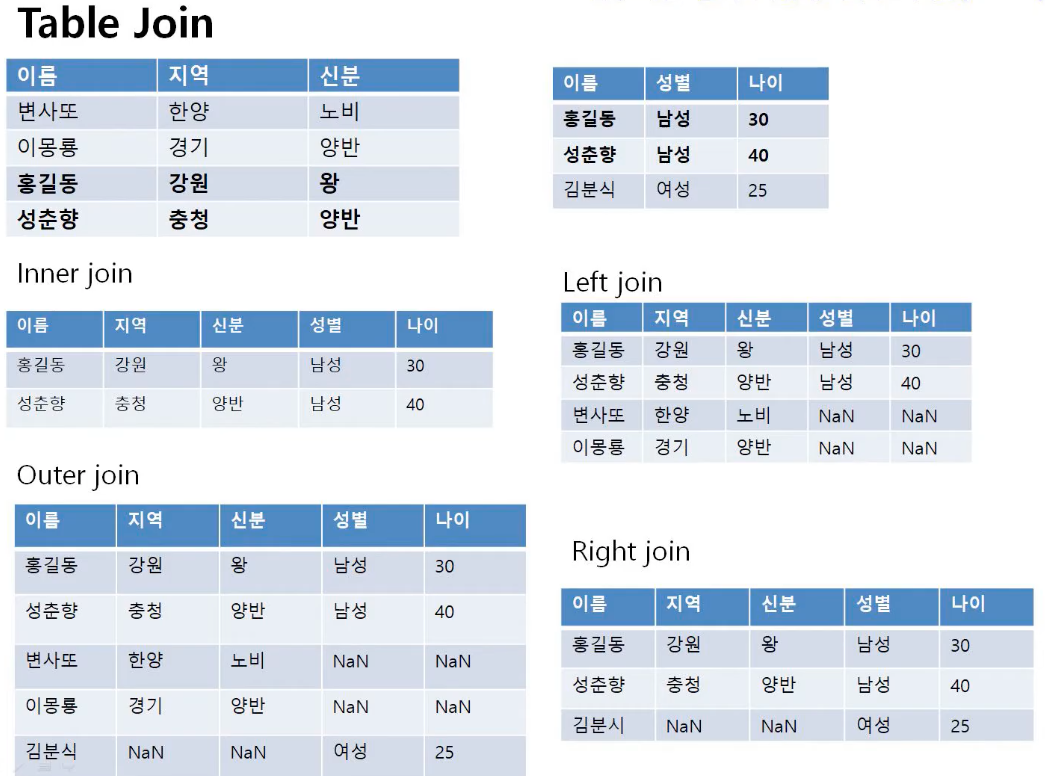

In [21]:
train1 = train.merge(oil, on = 'date', how='left')
train1 = train1.merge(holiday, on = 'date', how='left')
train1 = train1.merge(stores, on = 'store_nbr', how='left')
train1 = train1.merge(transactions, on = ['date', 'store_nbr'], how='left')
train1 = train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
## train1 . 
test1 = test.merge(oil, on = 'date', how='left')
test1 = test1.merge(holiday, on = 'date', how='left')
test1 = test1.merge(stores, on = 'store_nbr', how='left')
test1 = test1.merge(transactions, on = ['date', 'store_nbr'], how='left')
test1 = test1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
train1.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [23]:
test1.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,1.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,8.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,560.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,1.0,46.8,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN


In [24]:
train1["family"].value_counts()

BABY CARE                     92556
POULTRY                       92556
DELI                          92556
HOME AND KITCHEN I            92556
PRODUCE                       92556
GROCERY I                     92556
BEVERAGES                     92556
PERSONAL CARE                 92556
MAGAZINES                     92556
HOME APPLIANCES               92556
SEAFOOD                       92556
SCHOOL AND OFFICE SUPPLIES    92556
PLAYERS AND ELECTRONICS       92556
LAWN AND GARDEN               92556
BOOKS                         92556
DAIRY                         92556
CELEBRATION                   92556
LADIESWEAR                    92556
GROCERY II                    92556
AUTOMOTIVE                    92556
LIQUOR,WINE,BEER              92556
HOME CARE                     92556
PREPARED FOODS                92556
LINGERIE                      92556
HARDWARE                      92556
BREAD/BAKERY                  92556
CLEANING                      92556
EGGS                        

In [25]:
test1["family"].value_counts()

LINGERIE                      864
HARDWARE                      864
HOME AND KITCHEN I            864
HOME APPLIANCES               864
EGGS                          864
PREPARED FOODS                864
BOOKS                         864
LIQUOR,WINE,BEER              864
LADIESWEAR                    864
PRODUCE                       864
SCHOOL AND OFFICE SUPPLIES    864
LAWN AND GARDEN               864
GROCERY II                    864
DELI                          864
MEATS                         864
FROZEN FOODS                  864
PET SUPPLIES                  864
PERSONAL CARE                 864
PLAYERS AND ELECTRONICS       864
BEAUTY                        864
SEAFOOD                       864
BREAD/BAKERY                  864
DAIRY                         864
POULTRY                       864
MAGAZINES                     864
AUTOMOTIVE                    864
BEVERAGES                     864
HOME AND KITCHEN II           864
CLEANING                      864
CELEBRATION   

In [26]:
train1["city"].value_counts()

Quito            1018116
Guayaquil         452496
Cuenca            169686
Santo Domingo     169686
Ambato            113124
Latacunga         113124
Manta             113124
Machala           113124
Daule              56562
Guaranda           56562
Babahoyo           56562
Esmeraldas         56562
Salinas            56562
El Carmen          56562
Cayambe            56562
Quevedo            56562
Libertad           56562
Loja               56562
Puyo               56562
Ibarra             56562
Riobamba           56562
Playas             56562
Name: city, dtype: int64

In [27]:
train1["state"].value_counts()

Pichincha                         1074678
Guayas                             622182
Azuay                              169686
Santo Domingo de los Tsachilas     169686
Manabi                             169686
El Oro                             113124
Cotopaxi                           113124
Los Rios                           113124
Tungurahua                         113124
Santa Elena                         56562
Loja                                56562
Imbabura                            56562
Pastaza                             56562
Esmeraldas                          56562
Bolivar                             56562
Chimborazo                          56562
Name: state, dtype: int64

In [28]:
train1["onpromotion"].value_counts()

0.0       1382208
1.0        160079
2.0        114496
3.0         92448
4.0         82194
           ...   
994.0           1
995.0           1
996.0           1
1006.0          1
975.0           1
Name: onpromotion, Length: 991, dtype: int64

In [29]:
train1["store_type"].value_counts()

D    1018116
C     848430
A     509058
B     452496
E     226248
Name: store_type, dtype: int64

## Correlation b/w features



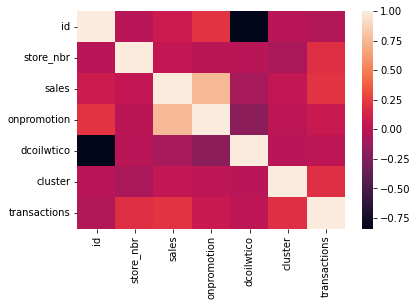

In [30]:
import seaborn as sns
corr = train1.corr()
sns.heatmap(corr)


## Visualizing closely correlated features

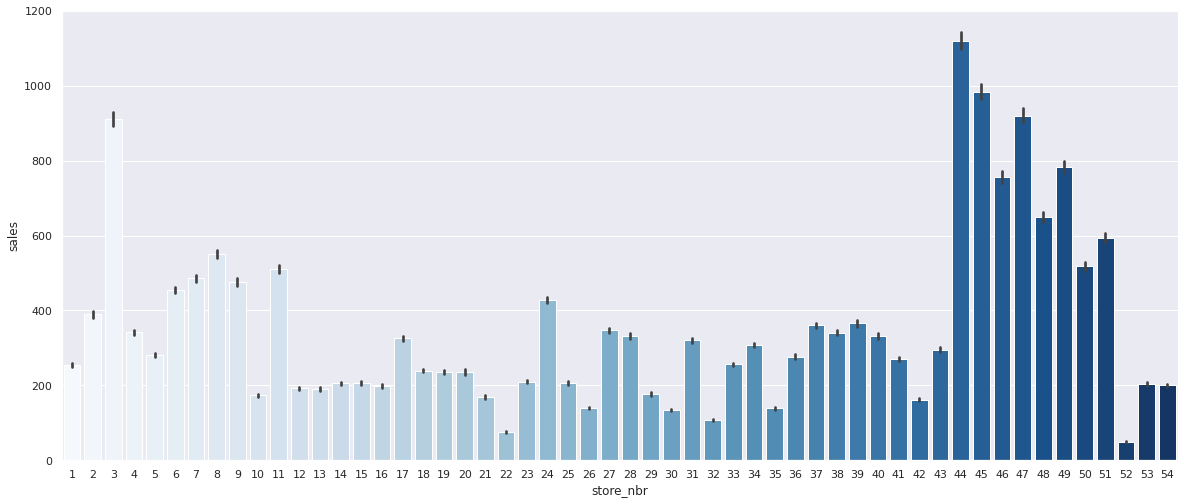

In [31]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data = train1,palette = "Blues")

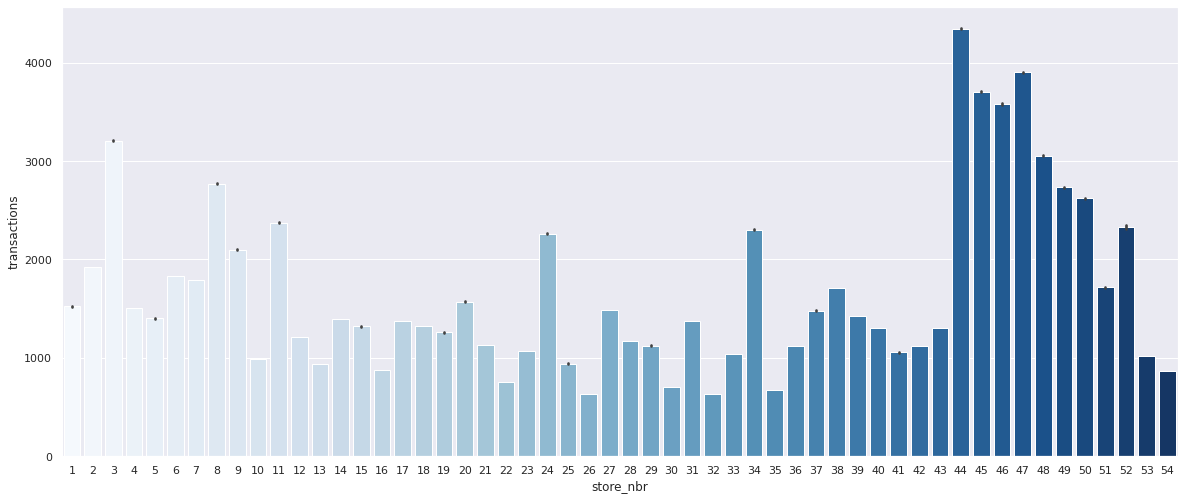

In [32]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'transactions',data = train1,palette = "Blues")

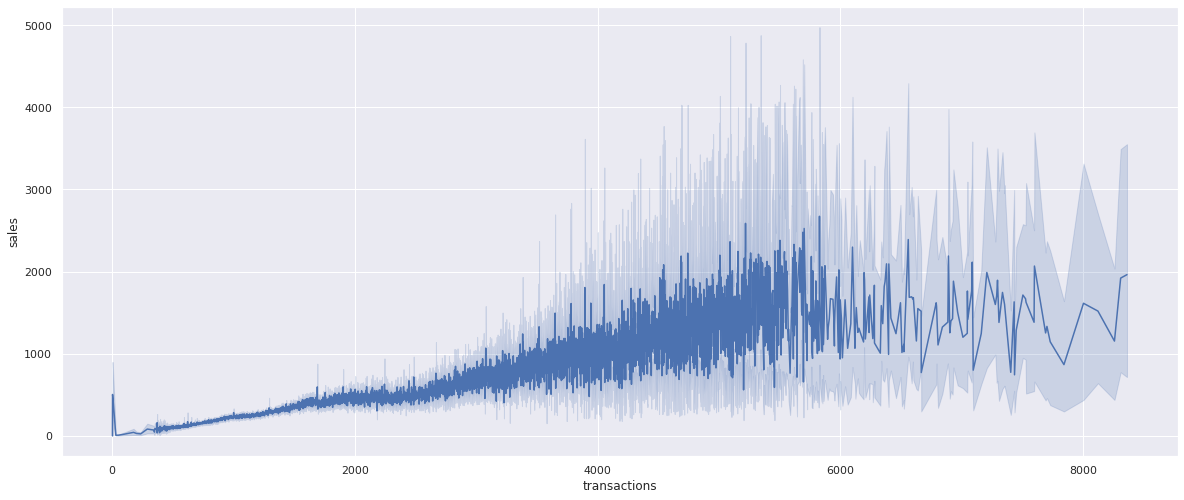

In [33]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = "transactions",y = 'sales',data = train1,palette = "Blues")

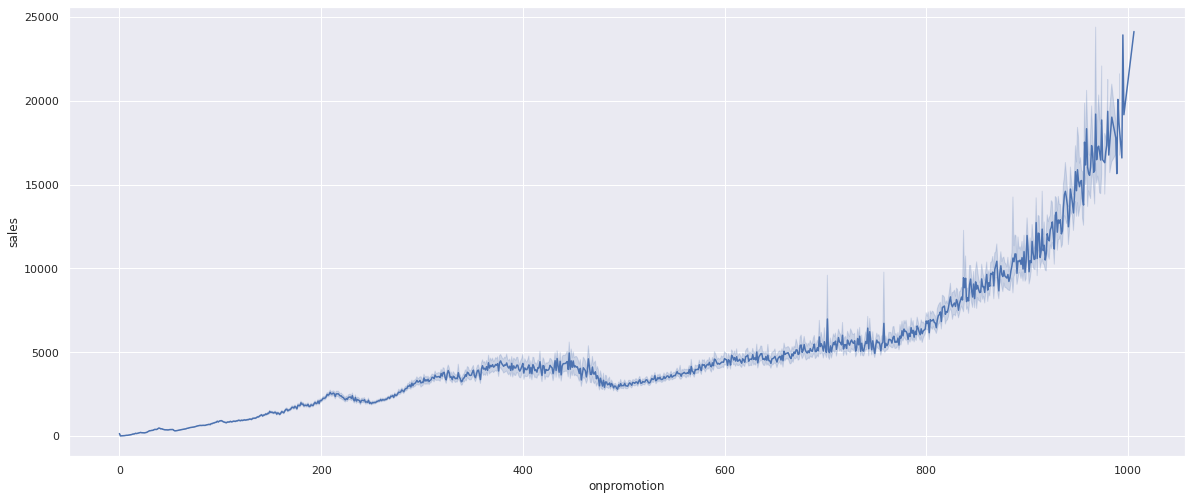

In [34]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(x = "onpromotion",y = 'sales',data = train1,palette = "Blues")

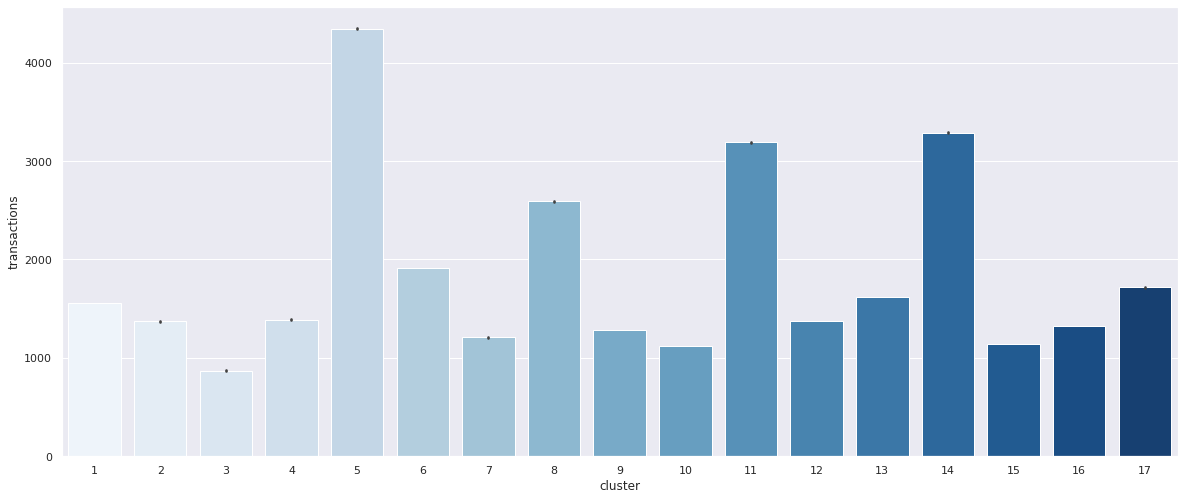

In [35]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'cluster',y = 'transactions',data = train1,palette = "Blues")

In [36]:
from sklearn.model_selection import train_test_split
features=['date','store_nbr','family','onpromotion','dcoilwtico','holiday_type','locale','locale_name','description','transferred','city','state','store_type','cluster','transactions']
X=train1[features]
y=train1.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

Feature: 0, Score: -0.00000


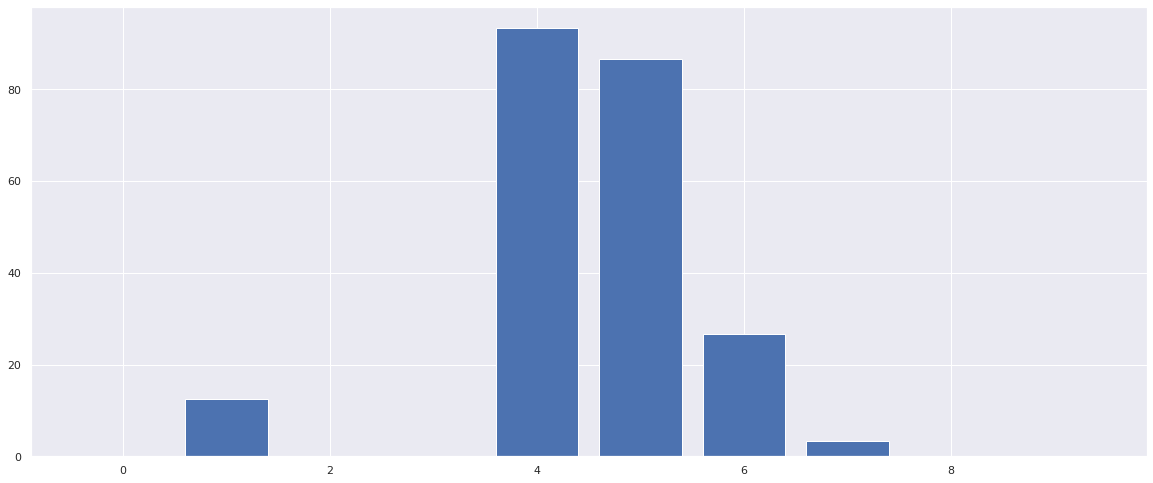

Feature: 1, Score: 12.44483


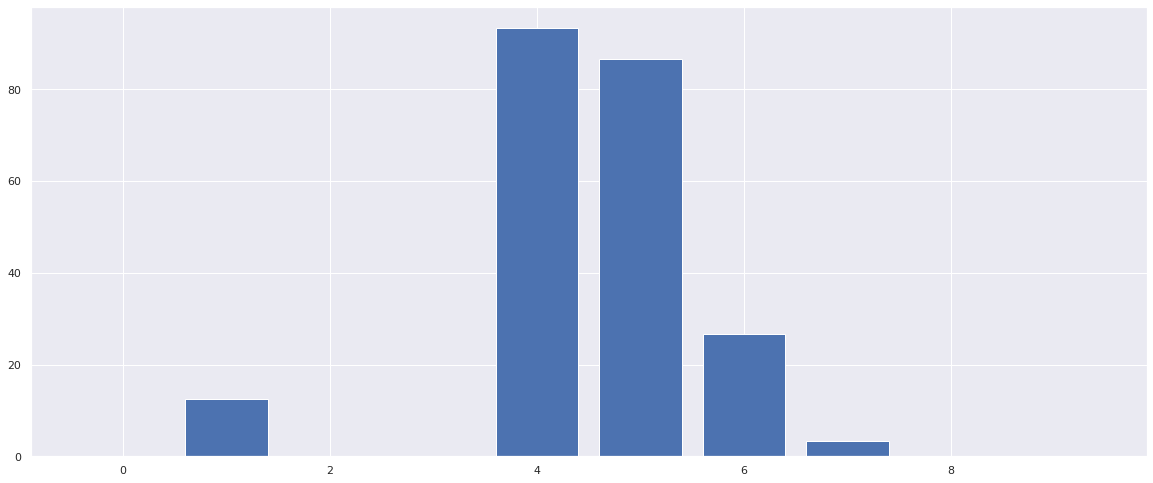

Feature: 2, Score: -0.00000


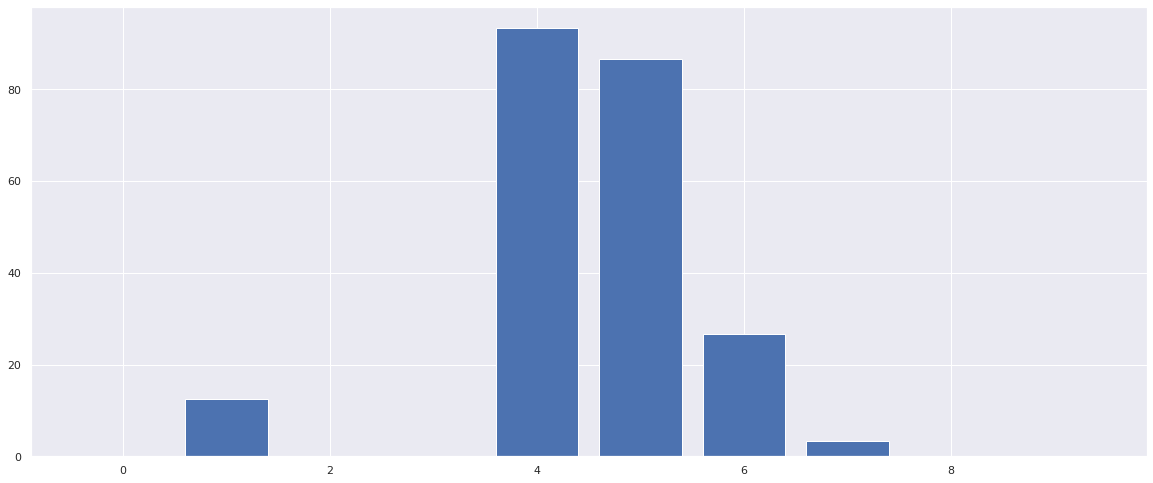

Feature: 3, Score: -0.00000


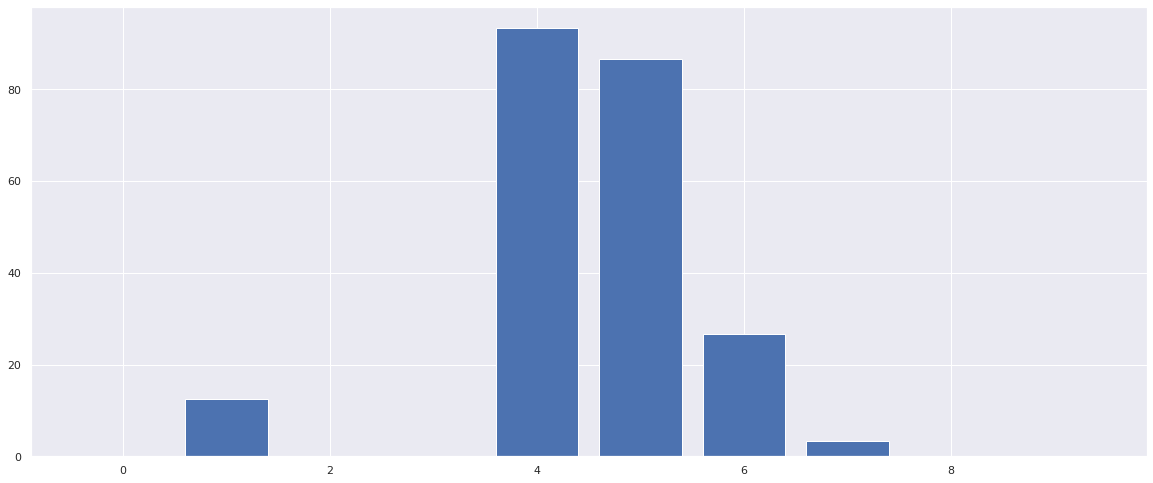

Feature: 4, Score: 93.32225


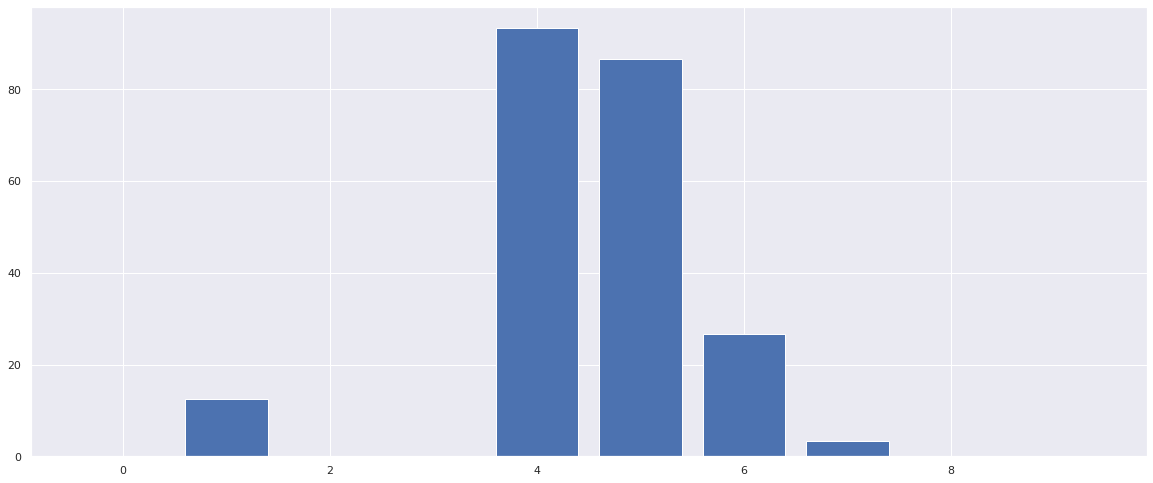

Feature: 5, Score: 86.50811


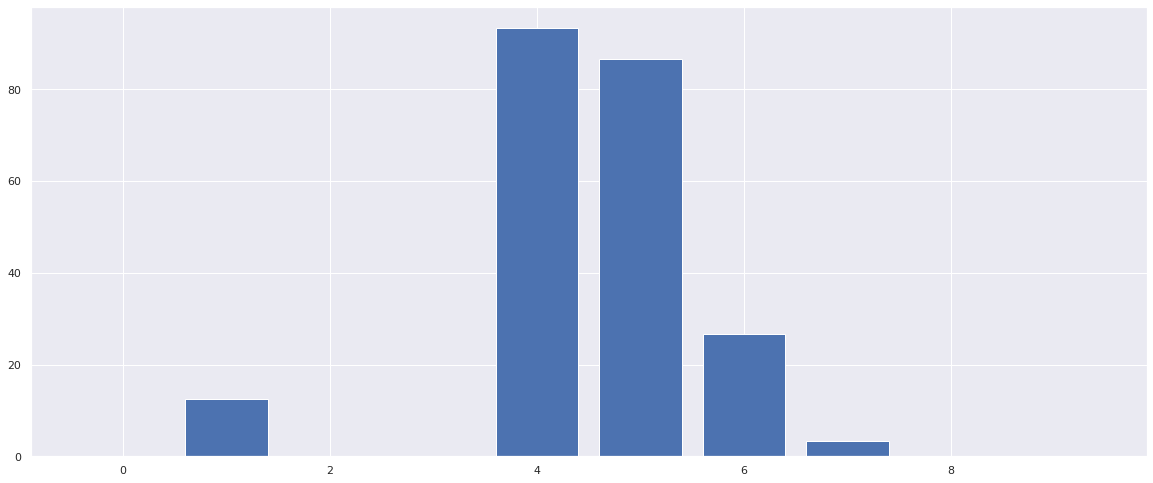

Feature: 6, Score: 26.74607


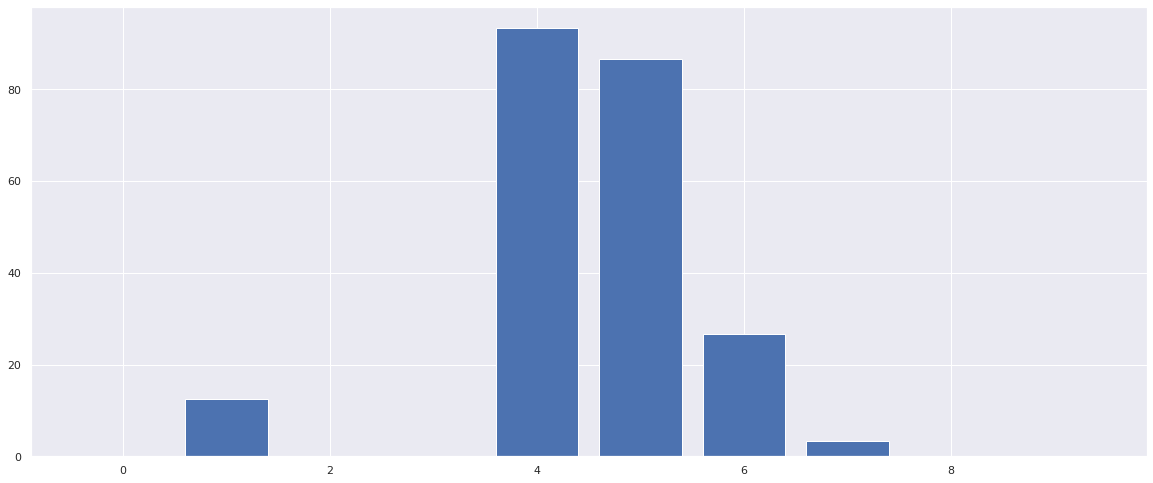

Feature: 7, Score: 3.28535


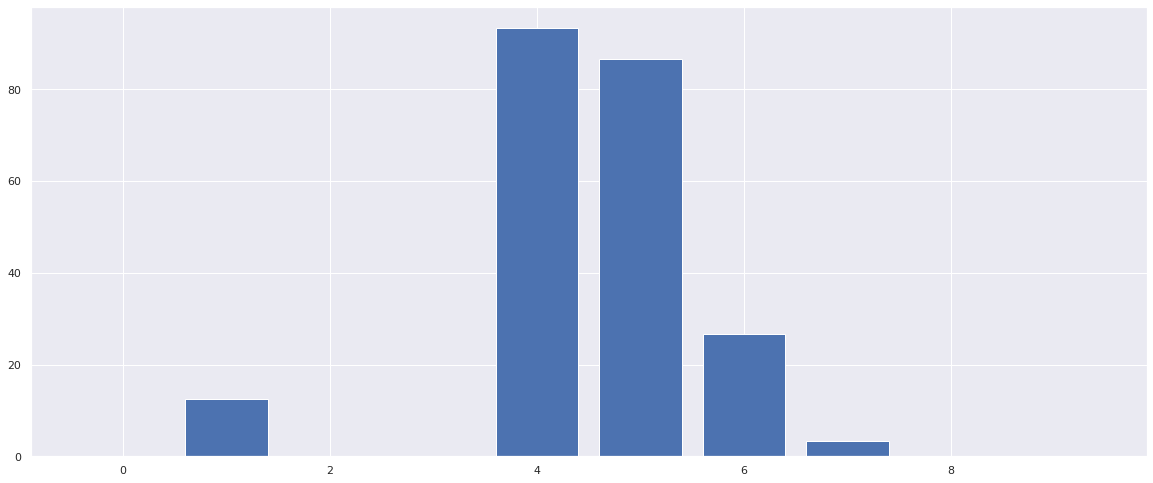

Feature: 8, Score: -0.00000


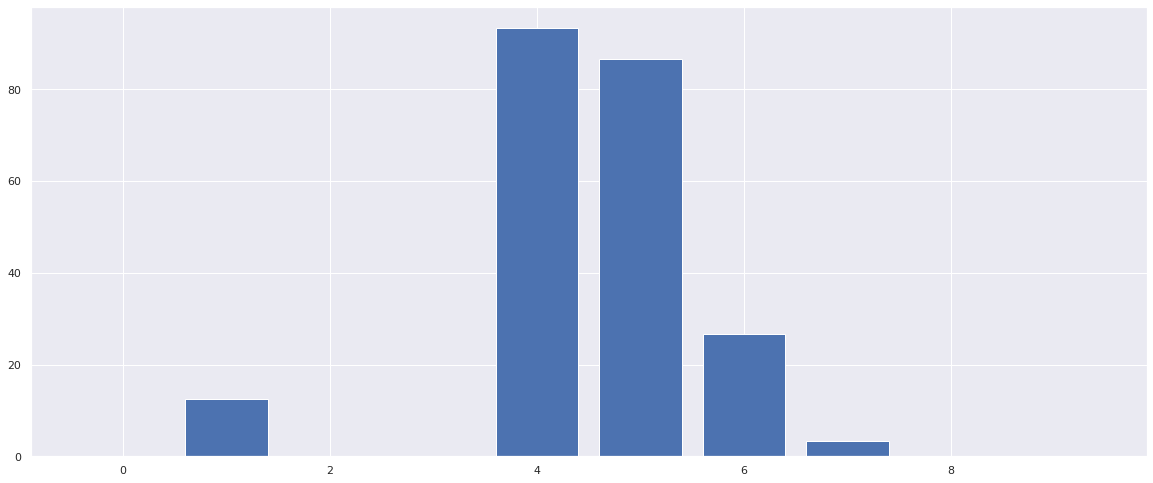

Feature: 9, Score: 0.00000


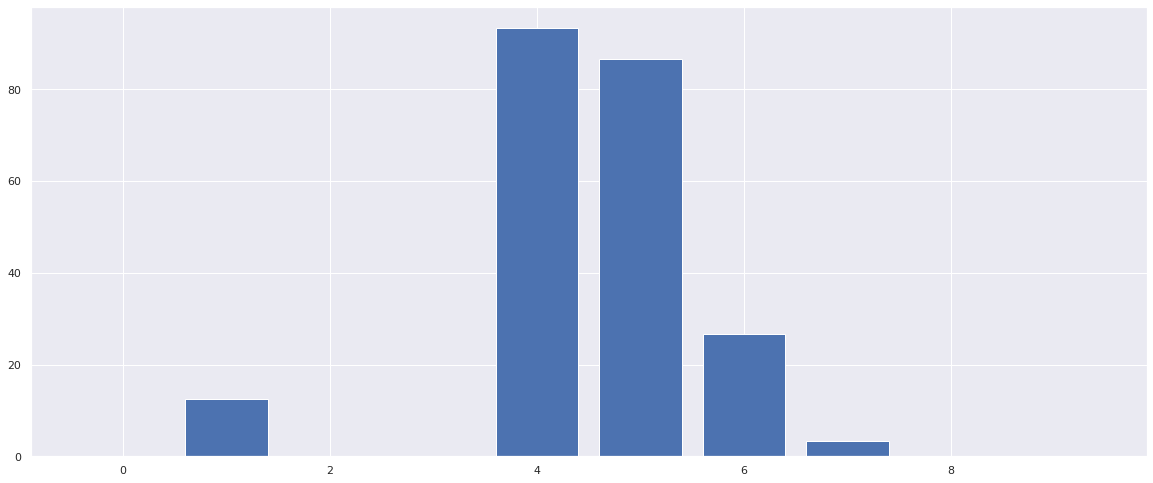

In [37]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

In [38]:
def feature_eng(data):
    data['date'] = pd.to_datetime(data['date'])
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    return data
    
train1 = feature_eng(train1)
test1 = feature_eng(test1)
train1.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,1,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,1,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,1,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,1,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0.0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN,1,1,1,2013,1,1
